# DEMO: Solving $H^{+}_2$ via Variational Method

## Populating the $H$ and $S$ Matrices

To determine the variationally optimal energy and wave function, we need to determine the variationally optimal linear coefficients $c_1$ and $c_2$ of the trial wave function.  The procedure for this is to:

1. Posit the trial wave function (done)
2. Populate the $H$ and $S$ matrices
3. Diagonalize $S^{-1}H$. 

Here will will populate the $2\times 2$ matrices.  

### The Overlap Matrix $S$

We start with $S$:

\begin{align}
S = \begin{bmatrix} S_{11} & S_{12} \\ S_{12} & S_22 \end{bmatrix}
\end{align}
where 
\begin{align}
S_{11} &= \left\langle 1s_A | 1s_A \right\rangle \\
S_{12} &= \left\langle 1s_A | 1s_B \right\rangle \\
S_{22} &= \left\langle 1s_B | 1s_B \right\rangle
\end{align}

From normalization conditions, we know that
\begin{align}
S_{11} &= 1 \\
S_{22} &= 1
\end{align}a

We now set about determining $S_{12}$:
\begin{align}
S_{12} &= \left\langle 1s_A | 1s_B \right\rangle \\
&= \int 1s_A(\vec{r})1s_B(\vec{r})d\vec{r}
\end{align}
This integral is somewhat involved but can be solved.  Rather than doing so here I just provide the solution
\begin{equation}
S_{12} = e^{-R}\left(1+R+\frac{R^2}{3}\right)
\end{equation}

We note the $S_{12}$ is a function of nuclear separation $R$.  This makes sense as the degree of overlap between the two 1s function will depend on then separation distance between the nuclei.  We should expect no overlap when the nuclei are infinitely separated and maximal overlap when the nuclei are sitting on top of each other.  Below is a plot of $S_{12}(R)$.

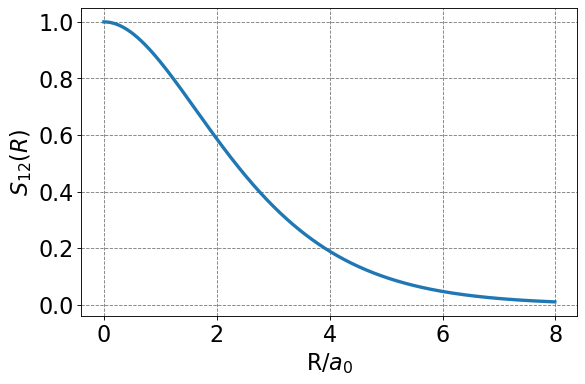

In [4]:
import numpy as np
def S12(R):
    return np.exp(-R)*(1+R+R**2/3)
import matplotlib.pyplot as plt
%matplotlib inline
R = np.arange(0,8,0.01)
plt.figure(figsize=(8,5),dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both',labelsize=20)
plt.grid( which='major', axis='both', color='#808080', linestyle='--')
plt.plot(R,S12(R),lw=3)
plt.xlabel(r'R/$a_0$',fontsize=20)
plt.ylabel(r'$S_{12}(R)$',fontsize=20);

From this information we can populate the $S$ matrix as a function of $R$.  For example, if we choose $R=2.5$ $a_0$ we get and $S$ matrix of
\begin{equation}
S(2.5) = \begin{bmatrix} 1 & 0.458 \\0.458 & 1 \end{bmatrix}
\end{equation}

Below is a code snippet to populate this matrix.

In [15]:
import numpy as np

def S(R):
    return np.array([[1,S12(R)],[S12(R),1]])

print("S_12(2.5) = ", S12(2.5))
print("S(2.5) = ")
print(S(2.5))

S_12(2.5) =  0.45830790898343504
S(2.5) = 
[[1.         0.45830791]
 [0.45830791 1.        ]]


### The Hamiltonian Matrix $H$:

The Hamiltonia matrix $H$ is more challenging.  We start with the definition

\begin{align}
H = \begin{bmatrix} H_{11} & H_{12} \\ H_{12} & H_{22} \end{bmatrix}
\end{align}
where 
\begin{align}
H_{11} &= \left\langle 1s_A | \hat{H} | 1s_A \right\rangle \\
H_{12} &= \left\langle 1s_A | \hat{H} | 1s_B \right\rangle \\
H_{22} &= \left\langle 1s_B | \hat{H} | 1s_B \right\rangle
\end{align}

Each of these will need to be determined but we will be able to determine $H_{22}$ by analogy to $H_{11}$ since all we are doing in swapping the identity of the electron.
\begin{align}
H_{11} &= \left\langle 1s_A | \hat{H} | 1s_A \right\rangle \\
&= \int 1s_A(\vec{r}) \left(-\frac{1}{2}\nabla_1^2 - \frac{1}{r_{1A}} - \frac{1}{r_{1B}}  + \frac{1}{R} \right) 1s_A(\vec{r})d\vec{r} \\
&= \int 1s_A(\vec{r}) \left(-\frac{1}{2}\nabla_1^2 - \frac{1}{r_{1A}} \right) 1s_A(\vec{r})d\vec{r} + \int 1s_A(\vec{r}) \left(- \frac{1}{r_{1B}}  + \frac{1}{R} \right) 1s_A(\vec{r})d\vec{r} \\
&= \int 1s_A(\vec{r}) \left(-\frac{1}{2}\nabla_1^2 - \frac{1}{r_{1A}} \right) 1s_A(\vec{r})d\vec{r} + \int 1s_A(\vec{r}) \left(- \frac{1}{r_{1B}} \right) 1s_A(\vec{r})d\vec{r} + \frac{1}{R}\int 1s_A(\vec{r})1s_A(\vec{r})d\vec{r}\\
&= E_{1s} + J + \frac{1}{R}
\end{align}
where we recognize that the first integral is simply the 1s energy of a hydrogen atom and we define the second integral as $J$, what is also called the *Coulomb integral*.  That is
\begin{align}
J &= \int 1s_A(\vec{r}) \left(- \frac{1}{r_{1B}} \right) 1s_A(\vec{r})d\vec{r} \\
&= -\int 1s_A(\vec{r})\frac{1}{r_{1B}}1s_A(\vec{r})d\vec{r} 
\end{align}
where that last integral becomes $\frac{1}{R}$ because $R$, the nuclear separation, is constant w.r.t $\vec{r}$ and the $1s_A$ function is normalized.

For the $H_2^+$ case the remaining integral in $J$ can be solved analytically.  Doing so yields
\begin{align}
J = e^{-2R}\left(1+\frac{1}{R}\right) - \frac{1}{R}
\end{align}

Thus, we get that 
\begin{align}
H_{11} & = E_{1s} + J + \frac{1}{R}= -\frac{1}{2} + e^{-2R}\left(1+\frac{1}{R}\right) \\
H_{22} & = E_{1s} + J + \frac{1}{R}= -\frac{1}{2} + e^{-2R}\left(1+\frac{1}{R}\right)
\end{align}

For $H_{12}$:
\begin{align}
H_{12} &= \left\langle 1s_A | \hat{H} | 1s_B \right\rangle \\
&= \int 1s_A(\vec{r}) \left(-\frac{1}{2}\nabla_1^2 - \frac{1}{r_{1A}} - \frac{1}{r_{1B}}  + \frac{1}{R} \right) 1s_B(\vec{r})d\vec{r} \\
&= \int 1s_A(\vec{r}) \left(-\frac{1}{2}\nabla_1^2 - \frac{1}{r_{1A}} \right) 1s_B(\vec{r})d\vec{r} + \int 1s_A(\vec{r}) \left(- \frac{1}{r_{1B}}  + \frac{1}{R} \right) 1s_B(\vec{r})d\vec{r} \\
&= \int 1s_A(\vec{r}) \left(-\frac{1}{2}\nabla_1^2 - \frac{1}{r_{1A}} \right) 1s_B(\vec{r})d\vec{r} + \int 1s_A(\vec{r}) \left(- \frac{1}{r_{1B}}\right)1s_B(\vec{r})d\vec{r} + \frac{1}{R}\int 1s_A(\vec{r}) 1s_B(\vec{r})d\vec{r} \\
&= E_{1s}S_{12} + K + \frac{S_{12}}{R}
\end{align}
where we recognize that $\left(-\frac{1}{2}\nabla_1^2 - \frac{1}{r_{1A}} \right) 1s_B = E_{1s}1s_B$, $S_{12} = \langle 1s_A | 1s_B\rangle$, and have defined the *exhange integral*, $K$, to be
\begin{align}
K &= \int 1s_A(\vec{r}) \left(- \frac{1}{r_{1B}}  \right) 1s_B(\vec{r})d\vec{r} \\
&= -\int 1s_A(\vec{r})\frac{1}{r_{1B}}1s_B(\vec{r})d\vec{r} \\
&= -e^{-R}\left(1+R\right)
\end{align}
where the last step I have used the solution for the simple case of H$_2^+$ but have not shown it to be true.  

We can now populate the $H$ matrix as
\begin{align}
H &= \begin{bmatrix} E_{1s} + J + \frac{1}{R} & E_{1s}S_{12} + K + \frac{S_{12}}{R} \\ E_{1s}S_{12} + K + \frac{S_{12}}{R} & E_{1s} + J + \frac{1}{R}\end{bmatrix} \\
&= \left(E_{1s} + \frac{1}{R}\right)\begin{bmatrix} 1 & S_{12} \\ S_{12} & 1\end{bmatrix} + \begin{bmatrix} J & K \\  K &  J \end{bmatrix}
\end{align}

For a nuclear separation value of 2.5 Bohr, for example, this yields
\begin{equation}
H(R=2.5) = \begin{bmatrix} -0.491 & -0.333 \\ -0.333 & -0.491\end{bmatrix}
\end{equation}
Below is the code to compute this.

In [12]:
import numpy as np

def H(R):
    J = np.exp(-2*R)*(1+1/R)- 1/R
    K = -np.exp(-R)*(1+R)
    H12 = H21 = -0.5*S12(R) + K + S12(R)/R
    H11 = H22 = -0.5 + J + 1/R
    return np.array([[H11,H12],[H21,H22]])

R = 2.5
print("H(1.5) = ")
print(H(R))

H(1.5) = 
[[-0.49056687 -0.33312829]
 [-0.33312829 -0.49056687]]


### Combined Solution

Now that we have equations for $H$ and $S$ in terms of $R$ (the nuclear separation; $S_{12}$, $J$, and $K$ are all functions of $R$), we can compute the eigenvalues and eigenvectors of $S^{-1}H$ for a given nuclear separation distance. 

Let's choose 2.5 Bohr, for example, in which case we have
\begin{align}
S(2.5) &= \begin{bmatrix} 1 & 0.458 \\0.458 & 1 \end{bmatrix} \\
H(2.5) &= \begin{bmatrix} -0.491 & -0.333 \\ -0.333 & -0.491\end{bmatrix} \\
S(2.5)^{-1}H(2.5) &= \begin{bmatrix} -0.428 & -0.138 \\ -0.138 & -0.428\end{bmatrix}
\end{align}

Computing the eigenvalues of $S(2.5)^{-1}H(2.5)$ yields:
\begin{equation}
E(2.5) = -0.565\text{ and } -0.291
\end{equation}
The ground state energy is the first (minimum) of these.  The corresponding eigenvectors (or vectors of variational coefficients) are 
\begin{equation}
v = \begin{bmatrix} -0.707 & 0.707 \\ -0.707 & -0.707\end{bmatrix}
\end{equation}
where these are listed as column vectors meaning the that coefficients for the ground state energy are
\begin{align}
c_1 &= -0.707 \\
c_2 &= -0.707
\end{align}

In [17]:
print("S^{-1}H(2.5) = ", np.dot(np.linalg.inv(S(2.5)),H(2.5)))
e, v = np.linalg.eig(np.dot(np.linalg.inv(S(2.5)),H(2.5)))
print("Eigenvalues:", e)
print("Eigenvectors:", v)

S^{-1}H(2.5) =  [[-0.4277358  -0.13709359]
 [-0.13709359 -0.4277358 ]]
Eigenvalues: [-0.56482939 -0.29064221]
Eigenvectors: [[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]


Due to the symmetry of this problem and normalization requirements, it turns out that the coefficients must always be
\begin{align}
c_1 &= \pm \frac{1}{\sqrt{2(1-S_{12})}} \\
c_2 &= \pm \frac{1}{\sqrt{2(1-S_{12})}}
\end{align}
That is the must always be the same magnitude (symmetry) and their values are dictated by normalization (which depends on the overlap of the two basis functions). 

The minimum energy state is the linear combination in which the coefficients both have the same sign.  The higher energy (antibonding orbital) has the coefficients with opposing sign.  These can be described as
\begin{align}
\phi_+ = \frac{1}{\sqrt{2(1-S_{12})}}\left(1s_A + 1s_B\right) \\
\phi_- = \frac{1}{\sqrt{2(1-S_{12})}}\left(1s_A - 1s_B\right)
\end{align}

## Solution as a Function of $R$

In order to investigate things such as the predicted bond length and bonding energy of this model of the H$_2^+$ molecule, we must perform the above calculation (population of the $H$ and $S$ matrices and diagonalization of the $S^{-1}H$ matrix) for various $R$ values.  The bond distance will be the value of $R$ at the minimum energy and the bonding energy will be the difference between the energy at that position and the energy at infinite separation of the nuclei ($-0.5$ Hartree in this case).  

Below I make a plot of energies as a function of $R$ for this model of the H$_2^+$ molecule.

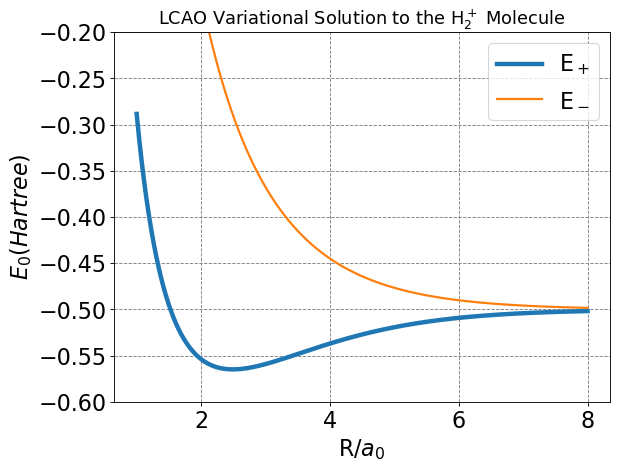

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
R = np.arange(1,8,0.001)
plt.figure(figsize=(8,6),dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both',labelsize=20)
plt.grid( which='major', axis='both', color='#808080', linestyle='--')
E = np.empty(R.size)
E_ab = np.empty(R.size)
for i, r in enumerate(R):
    e, v = np.linalg.eig(np.dot(np.linalg.inv(S(r)),H(r)))
    E[i] = np.amin(e)
    E_ab[i] = np.amax(e)
plt.plot(R,E,lw=4, label=r'E$_+$')
plt.plot(R,E_ab,lw=2, label=r'E$_-$')
plt.xlabel(r'R/$a_0$',fontsize=20)
plt.ylabel(r'$E_0 (Hartree)$',fontsize=20)
plt.ylim(-0.6,-0.2)
plt.legend(fontsize=20)
plt.title(r'LCAO Variational Solution to the H$_2^+$ Molecule',fontsize=16);

In [33]:
min_index = np.argmin(E)
print("Bonding energy:", np.round(E[min_index]+0.5,5), "Hartree or ", np.round(627.5895*(E[min_index]+0.5),5), "kcal/mol")
print("Bonding distance:", np.round(R[min_index],5), "Bohr")

Bonding energy: -0.06483 Hartree or  -40.68725 kcal/mol
Bonding distance: 2.493 Bohr


We see from the plot and code output above that the predicted bond distance for this model of H$_2^+$ is 2.493 Bohr with a bond energy of -0.06483 Hartree (-40.7 kcal/mol).

These are not actually in great agreement with the "exact" values of 1.999 Bohr and -0.1 Hartree.  But the simple approach outline here does give qualitative agreement and is a useful model for generalizing to other molecules.  

We could get better agreement in a number of ways.  These include:

1. Increasing the number of basis functions
2. Improving the basis functions (either by modifying them or including additional variational parameters)

## Orbital/Electron Densities

In [97]:
# make two plots of the same spherical harmonic
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm
from scipy.special import eval_genlaguerre
from scipy.special import lpmv
from scipy.special import factorial
%matplotlib inline
from scipy.optimize import root

a0 = 1.0 # radial unit of Bohr!   

def hydrogen_atom_wf(r,theta,phi,n,l,m):
    Y_norm = np.sqrt((2*l+1)*factorial(l-np.abs(m))/(4*np.pi*factorial(l+np.abs(m))))
    R_prefactor = -np.sqrt(factorial(n-l-1)/(2*n*factorial(n+l)))*(2.0/(n*a0))**(l+1.5)*np.power(r,l)*np.exp(-r/(n*a0))
    R = R_prefactor*eval_genlaguerre(n-l-1,2*l+1,2*r/(n*a0))
    return Y_norm*sph_harm(m, l, phi, theta).real*R

def h2plus_prob(r_nuc,x,y,z):
    r1 = np.sqrt(x*x + y*y + z*z)
    phi1 = np.arctan2(y,x)
    theta1 = np.arccos(z/r1)
    r2 = np.sqrt((x-r_nuc)**2 + y*y + z*z)
    phi2 = np.arctan2(y,x-r_nuc)
    theta2 = np.arccos(z/r2)
    #
    s12 = np.exp(-r_nuc)*(1+r_nuc+r_nuc**2/3)
    # 
    h2plus_wf = np.sqrt(1/(2*(1-s12)))*(hydrogen_atom_wf(r1,theta1,phi1,1,0,0) + hydrogen_atom_wf(r2,theta2,phi2,1,0,0))
    return h2plus_wf**2

def h2plus_anti_prob(r_nuc,x,y,z):
    r1 = np.sqrt(x*x + y*y + z*z)
    phi1 = np.arctan2(y,x)
    theta1 = np.arccos(z/r1)
    r2 = np.sqrt((x-r_nuc)**2 + y*y + z*z)
    phi2 = np.arctan2(y,x-r_nuc)
    theta2 = np.arccos(z/r2)
    #
    s12 = np.exp(-r_nuc)*(1+r_nuc+r_nuc**2/3)
    # 
    h2plus_wf = np.sqrt(1/(2*(1-s12)))*(hydrogen_atom_wf(r1,theta1,phi1,1,0,0) - hydrogen_atom_wf(r2,theta2,phi2,1,0,0))
    return h2plus_wf**2

def plot_h2plus_prob(r_nuc, ax_obj, r=np.linspace(0,2,20), theta=np.linspace(0,np.pi,20), phi=np.linspace(0,2*np.pi,25)):
    R, THETA, PHI = np.meshgrid(r, theta, phi)
    R = R.flatten()
    THETA = THETA.flatten()
    PHI = PHI.flatten()
    x = R*np.sin(THETA)*np.cos(PHI) 
    y = R*np.sin(THETA)*np.sin(PHI)
    z = R*np.cos(THETA)
    x = np.concatenate((x,x+r_nuc))
    y = np.concatenate((y,y))
    z = np.concatenate((z,z))
    wf = h2plus_prob(r_nuc,x,y,z)
    vmax = max(np.abs(np.amin(wf)),np.abs(np.amax(wf)))
    vmin = -vmax
    # plot
    ax_obj.set_title(rf'$R={r_nuc}$', fontsize=18)
    ax_obj.scatter3D(x,y,z,c=wf, cmap='RdBu', vmin=vmin, vmax=vmax,alpha=0.25)
    #ax_obj.set_box_aspect((100,100,100))
    ax_obj.set_axis_off()
    ax_obj.axes.xaxis.set_ticklabels([])
    ax_obj.axes.yaxis.set_ticklabels([])
    ax_obj.axes.zaxis.set_ticklabels([])
    
def plot_h2plus_prob_xz_projection(r_nuc, ax_obj):
    x = np.linspace(-2.5,8,1200)
    z = np.linspace(-2,2,600)
    X, Z= np.meshgrid(x, z)
    Y = np.zeros(X.shape)
    x = X.flatten()
    y = Y.flatten()
    z = Z.flatten()
    wf = h2plus_prob(r_nuc,x,y,z)
    wf = wf.reshape(X.shape)
    vmax = max(np.abs(np.amin(wf)),np.abs(np.amax(wf)))
    vmin = -vmax
    # plot
    ax_obj.set_title(rf'$R={r_nuc}$ Bonding', fontsize=18)
    #c = ax_obj.pcolormesh(X, Z, wf, cmap='RdBu', vmin=vmin, vmax=vmax)
    c = ax_obj.pcolormesh(X, Z, wf, cmap='hot_r',vmin=0,vmax=vmax)
    # set the limits of the plot to the limits of the data
    ax_obj.axis([-2.5, 8, -2, 2])
    ax_obj.set_aspect('equal')
    #ax_obj.set_axis_off()
    return c
def plot_h2plus_anti_prob_xz_projection(r_nuc, ax_obj):
    x = np.linspace(-2.5,8,1200)
    z = np.linspace(-2,2,600)
    X, Z= np.meshgrid(x, z)
    Y = np.zeros(X.shape)
    x = X.flatten()
    y = Y.flatten()
    z = Z.flatten()
    wf = h2plus_anti_prob(r_nuc,x,y,z)
    wf = wf.reshape(X.shape)
    vmax = max(np.abs(np.amin(wf)),np.abs(np.amax(wf)))
    vmin = -vmax
    # plot
    ax_obj.set_title(rf'$R={r_nuc}$ Antibonding', fontsize=18)
    #c = ax_obj.pcolormesh(X, Z, wf, cmap='RdBu', vmin=vmin, vmax=vmax)
    c = ax_obj.pcolormesh(X, Z, wf, cmap='hot_r',vmin=0,vmax=vmax)
    # set the limits of the plot to the limits of the data
    ax_obj.axis([-2.5, 8, -2, 2])
    ax_obj.set_aspect('equal')
    #ax_obj.set_axis_off()
    return c

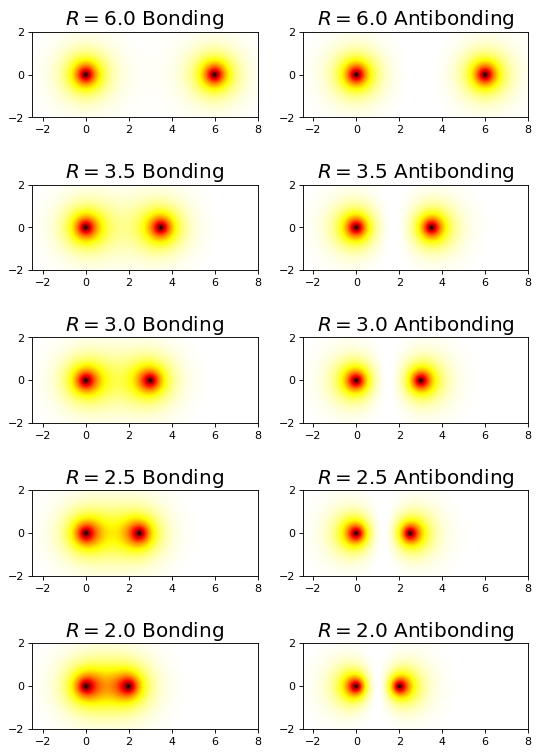

In [99]:
fig, ax = plt.subplots(5,2,figsize=(8,12),dpi= 80, facecolor='w', edgecolor='k') 
R = np.array([6.0,3.5,3.0,2.5,2.0])
for i, r in enumerate(R):
    plot_h2plus_prob_xz_projection(r,ax[i,0])
    plot_h2plus_anti_prob_xz_projection(r,ax[i,1])
plt.show();